House Pricing by Classification  
數學4B 107201535 陳羽暉

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
pd.set_option("max_columns", 50)
pd.set_option("max_rows", 50)

In [30]:
house_data = pd.read_csv("house_price.csv")
house_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,...,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,...,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,...,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [31]:
house_data['sp1'] = house_data['SalePrice']

In [32]:
sp = house_data['SalePrice']
house_data['sp1'][sp <= 129975.0] = 0     # SalePrice <= 1st Quartile (Q1)
house_data['sp1'][(129975.0 < sp) & (sp <= 163000.0)] = 1 # Q1 < SalePrice <= Median
house_data['sp1'][(163000.0 < sp) & (sp <= 214000.0)] = 2 # Median < SalePrice <= Q3
house_data['sp1'][214000.0 <= sp] = 3      # 3rd Quartile (Q3) <= SalePrice

house_data['sp1'].value_counts()

C:\Users\ASUS\AppData\Local\Temp/ipykernel_2220/1839226759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data['sp1'][sp <= 129975.0] = 0     # SalePrice <= 1st Quartile (Q1)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_2220/1839226759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data['sp1'][(129975.0 < sp) & (sp <= 163000.0)] = 1 # Q1 < SalePrice <= Median
C:\Users\ASUS\AppData\Local\Temp/ipykernel_2220/1839226759.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

3    367
1    367
0    365
2    361
Name: sp1, dtype: int64

In [33]:
house_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460.0,NaN,NaN,NaN,730.5,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,NaN,NaN,NaN,56.89726,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201.0,NaN,NaN,NaN,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1460.0,NaN,NaN,NaN,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
...,...,...,...,...,...,...,...,...,...,...,...
YrSold,1460.0,NaN,NaN,NaN,2007.815753,1.328095,2006.0,2007.0,2008.0,2009.0,2010.0
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SalePrice,1460.0,NaN,NaN,NaN,180921.19589,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0


In [34]:
X = house_data.drop('SalePrice', axis=1)  # X = mobile_data.iloc[:,0:20] : feature matrix
X = X.drop('sp1', axis=1)
y = house_data['sp1']               # y = mobile_data.iloc[:,-1]   : target vector
X.shape, y.shape

((1460, 80), (1460,))

In [35]:
y

0       2
1       2
2       3
3       1
4       3
       ..
1455    2
1456    2
1457    3
1458    1
1459    1
Name: sp1, Length: 1460, dtype: int64

In [36]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,...,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,...,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,...,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,...,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


3    367
1    367
0    365
2    361
Name: sp1, dtype: int64


<AxesSubplot:xlabel='sp1', ylabel='count'>

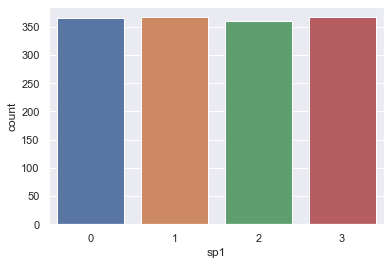

In [37]:
print(y.value_counts())
sns.countplot(x = y)

In [38]:
change = {
    "MSSubClass":[], 
    "MSZoning":["A", "C (all)", "FV", "I", "RH", "RL", "RP", "RM"], 
    "LotFrontage":[], 
    "LotArea":[], 
    "Street":["Grvl", "Pave"], 
    "Alley":["Grvl", "Pave", "NA"], 
    "LotShape":["Reg", "IR1", "IR2", "IR3"], 
    "LandContour":["Lvl", "Bnk", "HLS", "Low"], 
    "Utilities":["AllPub", "NoSewr", "NoSeWa", "ELO"], 
    "LotConfig":["Inside", "Corner", "CulDSac", "FR2", "FR3"], 
    "LandSlope":["Gtl", "Mod", "Sev"], 
    "Neighborhood":["Blmngtn", "Blueste", "BrDale", "BrkSide", "ClearCr", "CollgCr", "Crawfor", "Edwards", "Gilbert", "IDOTRR", "MeadowV", "Mitchel", "NAmes", "NoRidge", "NPkVill", "NridgHt", "NWAmes", "OldTown", "SWISU", "Sawyer", "SawyerW", "Somerst", "StoneBr", "Timber", "Veenker"], 
    "Condition1":["Artery", "Feedr", "Norm", "RRNn", "RRAn", "PosN", "PosA", "RRNe", "RRAe"], 
    "Condition2":["Artery", "Feedr", "Norm", "RRNn", "RRAn", "PosN", "PosA", "RRNe", "RRAe"], 
    "BldgType":["1Fam", "2fmCon", "Duplex", "TwnhsE", "TwnhsI", "Twnhs"], 
    "HouseStyle":["1Story", "1.5Fin", "1.5Unf", "2Story", "2.5Fin", "2.5Unf", "SFoyer", "SLvl"], 
    "OverallQual":[], 
    "OverallCond":[], 
    "YearBuilt":[], 
    "YearRemodAdd":[], 
    "RoofStyle":["Flat", "Gable", "Gambrel", "Hip", "Mansard", "Shed"], 
    "RoofMatl":["ClyTile", "CompShg", "Membran", "Metal", "Roll", "Tar&Grv", "WdShake", "WdShngl"], 
    "Exterior1st":["AsbShng", "AsphShn", "BrkComm", "BrkFace", "CBlock", "CemntBd", "HdBoard", "ImStucc", "MetalSd", "Other", "Plywood", "PreCast", "Stone", "Stucco", "VinylSd", "Wd Sdng", "WdShing"], 
    "Exterior2nd":["AsbShng", "AsphShn", "Brk Cmn", "BrkFace", "CBlock", "CmentBd", "HdBoard", "ImStucc", "MetalSd", "Other", "Plywood", "PreCast", "Stone", "Stucco", "VinylSd", "Wd Sdng", "Wd Shng", "WdShing"], 
    "MasVnrType":["BrkCmn", "BrkFace", "CBlock", "None", "Stone"], 
    "MasVnrArea":[], 
    "ExterQual":["Ex", "Gd", "TA", "Fa", "Po"], 
    "ExterCond":["Ex", "Gd", "TA", "Fa", "Po"], 
    "Foundation":["BrkTil", "CBlock", "PConc", "Slab", "Stone", "Wood"], 
    "BsmtQual":["Ex", "Gd", "TA", "Fa", "Po"], 
    "BsmtCond":["Ex", "Gd", "TA", "Fa", "Po"], 
    "BsmtExposure":["Gd", "Av", "Mn", "No", "NA"], 
    "BsmtFinType1":["GLQ", "ALQ", "BLQ", "Rec", "LwQ", "Unf"], 
    "BsmtFinSF1":[], 
    "BsmtFinType2":["GLQ", "ALQ", "BLQ", "Rec", "LwQ", "Unf"], 
    "BsmtFinSF2":[], 
    "BsmtUnfSF":[], 
    "TotalBsmtSF":[], 
    "Heating":["Floor", "GasA", "GasW", "Grav", "OthW", "Wall"], 
    "HeatingQC":["Ex", "Gd", "TA", "Fa", "Po"], 
    "CentralAir":["N", "Y"], 
    "Electrical":["SBrkr", "FuseA", "FuseF", "FuseP", "Mix"], 
    "1stFlrSF":[], 
    "2ndFlrSF":[], 
    "LowQualFinSF":[], 
    "GrLivArea":[], 
    "BsmtFullBath":[], 
    "BsmtHalfBath":[], 
    "FullBath":[], 
    "HalfBath":[], 
    "BedroomAbvGr":[], 
    "KitchenAbvGr":[], 
    "KitchenQual":["Ex", "Gd", "TA", "Fa", "Po"], 
    "TotRmsAbvGrd":[], 
    "Functional":["Typ", "Min1", "Min2", "Mod", "Maj1", "Maj2", "Sev", "Sal"], 
    "Fireplaces":[], 
    "FireplaceQu":["Ex", "Gd", "TA", "Fa", "Po"], 
    "GarageType":["2Types", "Attchd", "Basment", "BuiltIn", "CarPort", "Detchd"], 
    "GarageYrBlt":[], 
    "GarageFinish":["Fin", "RFn", "Unf"], 
    "GarageCars":[], 
    "GarageArea":[], 
    "GarageQual":["Ex", "Gd", "TA", "Fa", "Po"], 
    "GarageCond":["Ex", "Gd", "TA", "Fa", "Po"], 
    "PavedDrive":["Y", "P", "N"], 
    "WoodDeckSF":[], 
    "OpenPorchSF":[], 
    "EnclosedPorch":[], 
    "3SsnPorch":[], 
    "ScreenPorch":[], 
    "PoolArea":[], 
    "PoolQC":["Ex", "Gd", "TA", "Fa"], 
    "Fence":["GdPrv", "MnPrv", "GdWo", "MnWw"], 
    "MiscFeature":["Elev", "Gar2", "Othr", "Shed", "TenC"], 
    "MiscVal":[], 
    "MoSold":[], 
    "YrSold":[], 
    "SaleType":["WD", "CWD", "VWD", "New", "COD", "Con", "ConLw", "ConLI", "ConLD", "Oth"], 
    "SaleCondition":["Normal", "Abnorml", "AdjLand", "Alloca", "Family", "Partial"]
}

for i in change.keys():
    for j in range(1460):
        if (X.loc[j, i] in change[i]):
            X.loc[j, i] = change[i].index(X.loc[j, i]) + 1
        if (np.isnan(X.loc[j, i])):
            X.loc[j, i] = 0
            


In [39]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,6,65.0,8450,2,0,1,1,1,1,1,6,3,3,1,4,7,5,2003,2003,2,2,15,15,...,1,0,0,2,2003.0,2,2,548,3,3,1,0,61,0,0,0,0,0,0,0,0,2,2008,1,1
1,2,20,6,80.0,9600,2,0,1,1,1,4,1,25,2,3,1,1,6,8,1976,1976,2,2,9,9,...,1,1,3,2,1976.0,2,2,460,3,3,1,298,0,0,0,0,0,0,0,0,0,5,2007,1,1
2,3,60,6,68.0,11250,2,0,2,1,1,1,1,6,3,3,1,4,7,5,2001,2002,2,2,15,15,...,1,1,3,2,2001.0,2,2,608,3,3,1,0,42,0,0,0,0,0,0,0,0,9,2008,1,1
3,4,70,6,60.0,9550,2,0,2,1,1,2,1,7,3,3,1,4,7,5,1915,1970,2,2,16,17,...,1,1,2,6,1998.0,3,3,642,3,3,1,0,35,272,0,0,0,0,0,0,0,2,2006,1,2
4,5,60,6,84.0,14260,2,0,2,1,1,4,1,14,3,3,1,4,8,5,2000,2000,2,2,15,15,...,1,1,3,2,2000.0,2,3,836,3,3,1,192,84,0,0,0,0,0,0,0,0,12,2008,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,6,62.0,7917,2,0,1,1,1,1,1,9,3,3,1,4,6,5,1999,2000,2,2,15,15,...,1,1,3,2,1999.0,2,2,460,3,3,1,0,40,0,0,0,0,0,0,0,0,8,2007,1,1
1456,1457,20,6,85.0,13175,2,0,1,1,1,1,1,17,3,3,1,1,6,6,1978,1988,2,2,11,11,...,2,2,3,2,1978.0,3,2,500,3,3,1,349,0,0,0,0,0,0,2,0,0,2,2010,1,1
1457,1458,70,6,66.0,9042,2,0,1,1,1,1,1,7,3,3,1,4,7,9,1941,2006,2,2,6,6,...,1,2,2,2,1941.0,2,1,252,3,3,1,0,60,0,0,0,0,0,1,4,2500,5,2010,1,1
1458,1459,20,6,68.0,9717,2,0,1,1,1,1,1,13,3,3,1,1,5,6,1950,1996,4,2,9,9,...,1,0,0,2,1950.0,3,1,240,3,3,1,366,0,112,0,0,0,0,0,0,0,4,2010,1,1


In [40]:
from sklearn.svm import LinearSVC  # Linear Support Vector Classification
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.001, penalty="l1", dual=False)
lsvc_model = SelectFromModel(lsvc).fit(X, y)
X_lsvc = lsvc_model.transform(X)
X_lsvc.shape

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(1460, 25)

In [41]:
lsvc_model.threshold_

1e-05

In [42]:
lsvc_model.get_support()

array([ True,  True, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False, False, False,  True, False,  True, False, False])

In [43]:
list(X.columns[lsvc_model.get_support()])

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold']

In [44]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

##  Selecting Top 10 Best Features using SelectKBest class
kc = SelectKBest(score_func=chi2, k=10)
kf = SelectKBest(score_func=f_classif, k=10)
km = SelectKBest(score_func=mutual_info_classif, k=10)

kc_fit = kc.fit(X,y)
kf_fit = kf.fit(X,y)
km_fit = km.fit(X,y)

kc_scores = pd.DataFrame(kc_fit.scores_)  # Scores of features.
kf_scores = pd.DataFrame(kf_fit.scores_)  # Scores of features.
km_scores = pd.DataFrame(km_fit.scores_)  # Scores of features.
X_columns = pd.DataFrame(X.columns)

# Combine dataframes ... 
featureScores = pd.concat([X_columns, kc_scores, kf_scores, km_scores], axis=1)
# Naming the dataframe's columns ...
featureScores.columns = ['Specs', 'chi2_Scores', 'f-test_Scores', 
                         'mutual_info_scores'] 
featureScores

,Specs,chi2_Scores,f-test_Scores,mutual_info_scores
0,Id,547.390719,0.749464,0.000000
1,MSSubClass,590.557493,6.328079,0.264356
2,MSZoning,28.597547,59.284544,0.117492
3,LotFrontage,856.221513,14.054049,0.174247
4,LotArea,907949.948129,34.124856,0.212258
...,...,...,...,...
75,MiscVal,9738.170749,0.573028,0.000000
76,MoSold,9.817797,2.841119,0.013076
77,YrSold,0.001366,0.517967,0.013933
78,SaleType,26.254309,7.050042,0.013359


<Figure size 720x1440 with 0 Axes>

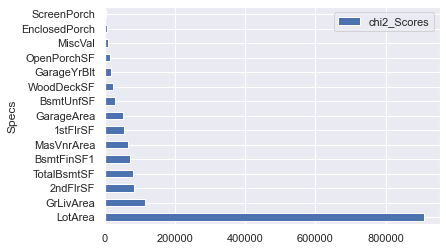

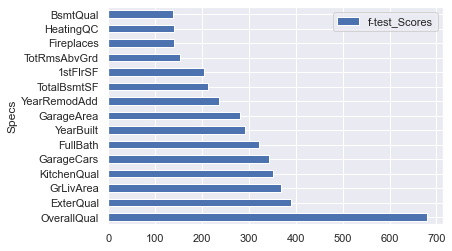

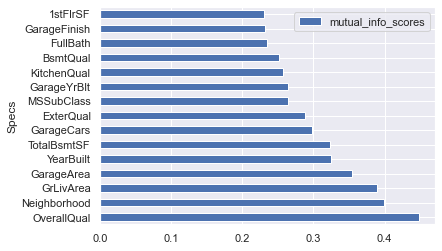

In [45]:
plt.figure(1, figsize=(10, 20))
for i in range(3):
    # plt.subplot(131+i)
    fs = featureScores.columns[i+1]
    best_features = featureScores.nlargest(15, fs)[['Specs', fs]]
    best_features.plot.barh('Specs');   # pands plot()

In [46]:
X.columns  # the original features

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [65]:
X_features = X[['OverallQual',
 'Neighborhood',
 'GrLivArea',
 'GarageArea',
 'GarageCars',
 'YearBuilt',
 'TotalBsmtSF',
 'BsmtQual',
 'GarageYrBlt',
 'ExterQual', 
 'KitchenQual', 
 'GarageFinish', 
 'FullBath', 
 'YearRemodAdd', 
 '1stFlrSF']]
X_features

,OverallQual,Neighborhood,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,BsmtQual,GarageYrBlt,ExterQual,KitchenQual,GarageFinish,FullBath,YearRemodAdd,1stFlrSF
0,7,6,1710,548,2,2003,856,2,2003.0,2,2,2,2,2003,856
1,6,25,1262,460,2,1976,1262,2,1976.0,3,3,2,2,1976,1262
2,7,6,1786,608,2,2001,920,2,2001.0,2,2,2,2,2002,920
3,7,7,1717,642,3,1915,756,3,1998.0,3,2,3,1,1970,961
4,8,14,2198,836,3,2000,1145,2,2000.0,2,2,2,2,2000,1145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,9,1647,460,2,1999,953,2,1999.0,3,3,2,2,2000,953
1456,6,17,2073,500,2,1978,1542,2,1978.0,3,3,3,2,1988,2073
1457,7,7,2340,252,1,1941,1152,3,1941.0,1,2,2,2,2006,1188
1458,5,13,1078,240,1,1950,1078,3,1950.0,3,2,3,1,1996,1078


In [66]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
Xn = standard_scaler.fit_transform(X_features)

In [67]:
from sklearn.model_selection import train_test_split
X1, X2, y1, y2 = train_test_split(Xn, y, random_state=0,
                                  train_size=0.85, test_size=0.15)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
estimators = [('nb', GaussianNB()), 
              ('knn', KNeighborsClassifier(n_neighbors=1)), 
              ('lr', LogisticRegression(random_state=1)), 
              ('dtc', DecisionTreeClassifier(random_state=1)), 
              ('rfc', RandomForestClassifier(n_estimators=200, random_state=1)), 
              ('etc', ExtraTreesClassifier(n_estimators=100, random_state=1)), 
              ('mlp', MLPClassifier())]

model = [GaussianNB(),
         KNeighborsClassifier(n_neighbors=1), 
         LogisticRegression(random_state=1),
         DecisionTreeClassifier(random_state=1), 
         RandomForestClassifier(n_estimators=200, random_state=1),
         ExtraTreesClassifier(n_estimators=100, random_state=1), 
         MLPClassifier(), 
         StackingClassifier(estimators=estimators)]


model = [model[i].fit(X1,y1) for i in range(len(model))]
pred  = [model[i].predict(X2) for i in range(len(model))]

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

In [69]:
from sklearn.metrics import accuracy_score
acc = [accuracy_score(y2, pred[i]) for i in range(len(model))]
print(len(model), "\n")
num_chr = [10, 20, 12, 12, 12, 10, 13, 17]
for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \t', acc[i])

8 

GaussianNB: 	 0.680365296803653
KNeighborsClassifier: 	 0.7214611872146118
LogisticRegr: 	 0.771689497716895
DecisionTree: 	 0.684931506849315
RandomForest: 	 0.7671232876712328
ExtraTrees: 	 0.7534246575342466
MLPClassifier: 	 0.7945205479452054
StackingClassifie: 	 0.8036529680365296


GaussianNB: 	 0.680365296803653
KNeighborsClassifier: 	 0.7214611872146118
LogisticRegr: 	 0.771689497716895
DecisionTree: 	 0.684931506849315
RandomForest: 	 0.7671232876712328
ExtraTrees: 	 0.7534246575342466
MLPClassifier: 	 0.7945205479452054
StackingClassifie: 	 0.8036529680365296


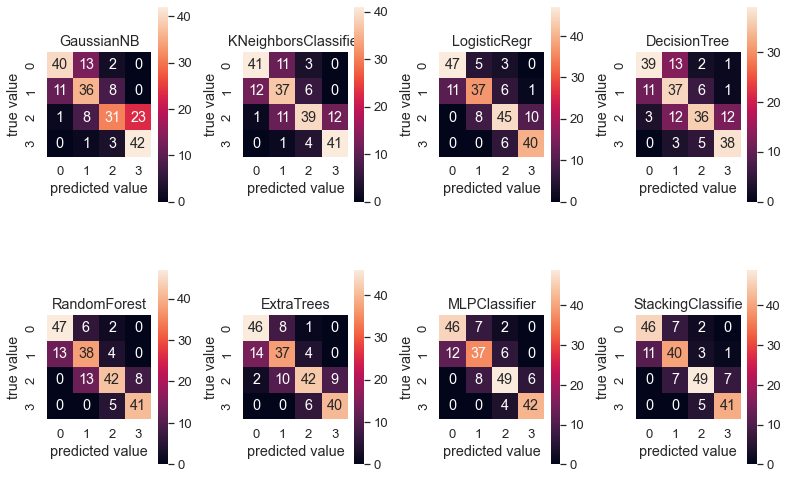

In [70]:
n_clf = len(model)
clfs = [str(model[i])[:num_chr[i]] 
                    for i in range(n_clf)]

# Compute the confusion matrix...
from sklearn.metrics import confusion_matrix
mat = [confusion_matrix(y2, pred[i]) for i in range(n_clf)]

# Plot the confusion matrix as a color-encoded matrix...
# set up the figure
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, 
                    hspace=0.35, wspace=0.5)

# plot the confusion matrices
for i in range(n_clf):
    sns.set(font_scale=1.2)
    fig.add_subplot(3, n_clf//2, i + 1, xticks=[], yticks=[])
    print(str(model[i])[:num_chr[i]] + ': \t', acc[i])
    sns.heatmap(mat[i], square=True, annot=True, cbar=True)
    plt.ylim(4, 0)
    plt.title(clfs[i])
    plt.xlabel('predicted value')
    plt.ylabel('true value');

一開始先用Linear SVC來找比較重要的features，Linear SVC的features經過training之後得出來的結果在最差的GaussinNB正確率0.39最高的是0.79的Random Forest，回去看features的項目之後發現有些特徵表達的是相同的特性，有些基本上不影響結果，於是再用mutual_info來找features，得出來的結果是最差的GaussinNB是0.68最高的Stacking Classifie是0.80，雖然其他演算法有的反而沒有變得更好，但是上限和下限都有明顯增加，所以在features的挑選上把無關緊要的刪除以及將同類型的合併不僅可以減少計算量，對於準確率也苦已有所提升。